In [1]:
# Importing necessary libraries
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../../')  

import class_func as cf 
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd 

In [2]:
# Creating data object with data file
data = cf.OC_data(data_file="../ny_vir.xlsx")

In [3]:
data.df

,Mintimes,Mintypes,Errors,Units,Data_group,Ecorr,OC,Weights
0,2.450223e+06,0,0.000040,JD,ccd,-29214.0,-0.000223,6.250000e+08
1,2.450223e+06,0,0.000020,JD,ccd,-29213.0,-0.000109,2.500000e+09
2,2.450224e+06,0,0.000030,JD,ccd,-29204.0,-0.000182,1.111111e+09
3,2.450224e+06,0,0.000030,JD,ccd,-29203.0,-0.000148,1.111111e+09
4,2.450230e+06,0,0.000020,JD,pe,-29146.0,-0.000258,2.500000e+09
...,...,...,...,...,...,...,...,...
971,2.459691e+06,0,0.000046,JD,ccd,64511.0,0.000017,4.771429e+08
972,2.459691e+06,0,0.000046,JD,ccd,64512.0,0.000093,4.809172e+08
973,2.459691e+06,0,0.000046,JD,ccd,64513.0,0.000021,4.809172e+08
974,2.459691e+06,0,0.000046,JD,ccd,64514.0,0.000008,4.750652e+08


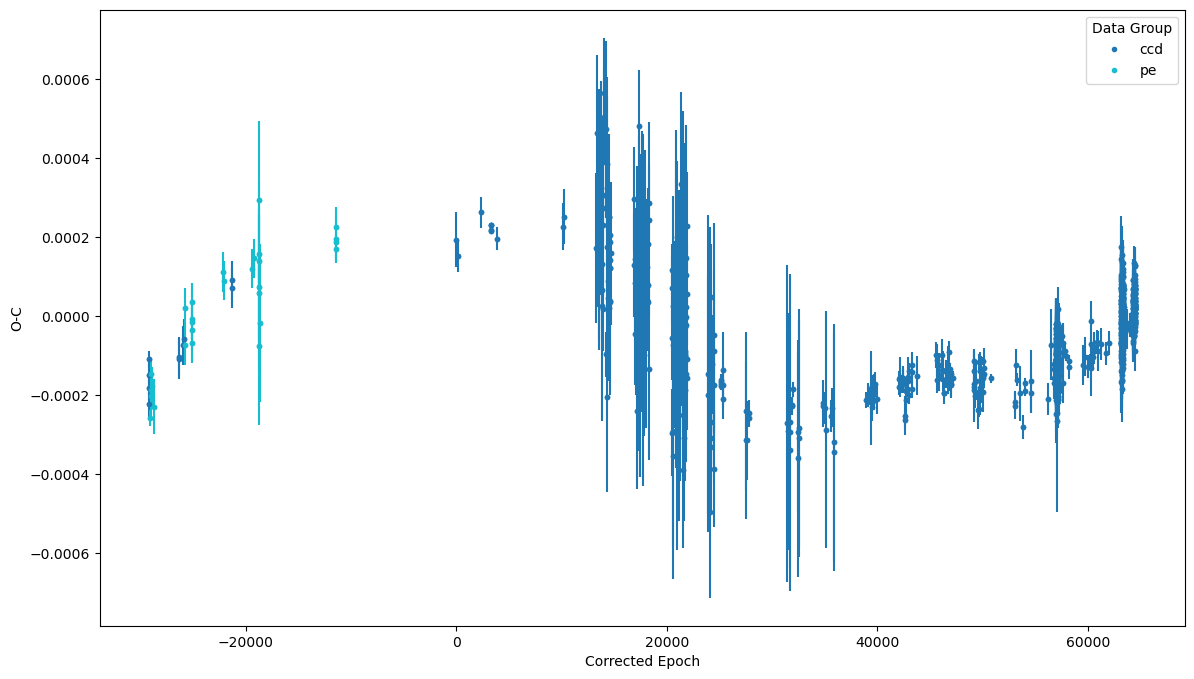

In [ ]:
# Plotting data
data.plot_OC()

In [5]:
# Creating model components for model
lite = cf.LiTE() 
lite.amp = cf.Parameter(7.57e-05, min=0)
lite.e = cf.Parameter(.1, min=0, max=1)
lite.P_LiTE = cf.Parameter(3000, unit="day", min=0)
lite.T_LiTE = cf.Parameter(2453000, unit="BJD", min=0)
lite.omega = cf.Parameter(0, min=0, max=360)
lite.name = "lte1"
lite2 = cf.LiTE() 
lite2.amp = cf.Parameter(0.00023, min=0)
lite2.e = cf.Parameter(.2, min=0, max=1)
lite2.P_LiTE = cf.Parameter(8300, unit="day", min=0)
lite2.T_LiTE = cf.Parameter(2450000, unit="BJD", min=0)
lite2.omega = cf.Parameter(0, min=0, max=360)
lite2.name = "lte2"

# Creating model object and adding model components into model
model = cf.OC_model(Ref_period=data.Ref_period, Ref_mintime=data.Ref_mintime)
model.add_model_component(lite)
model.add_model_component(lite2)
model.summary() 


{'Model Name': 'OC_Model', 'Model Components': ['lte1', 'lte2']}

In [6]:
# Creating fit object
fit = cf.fit(model=model, data=data)

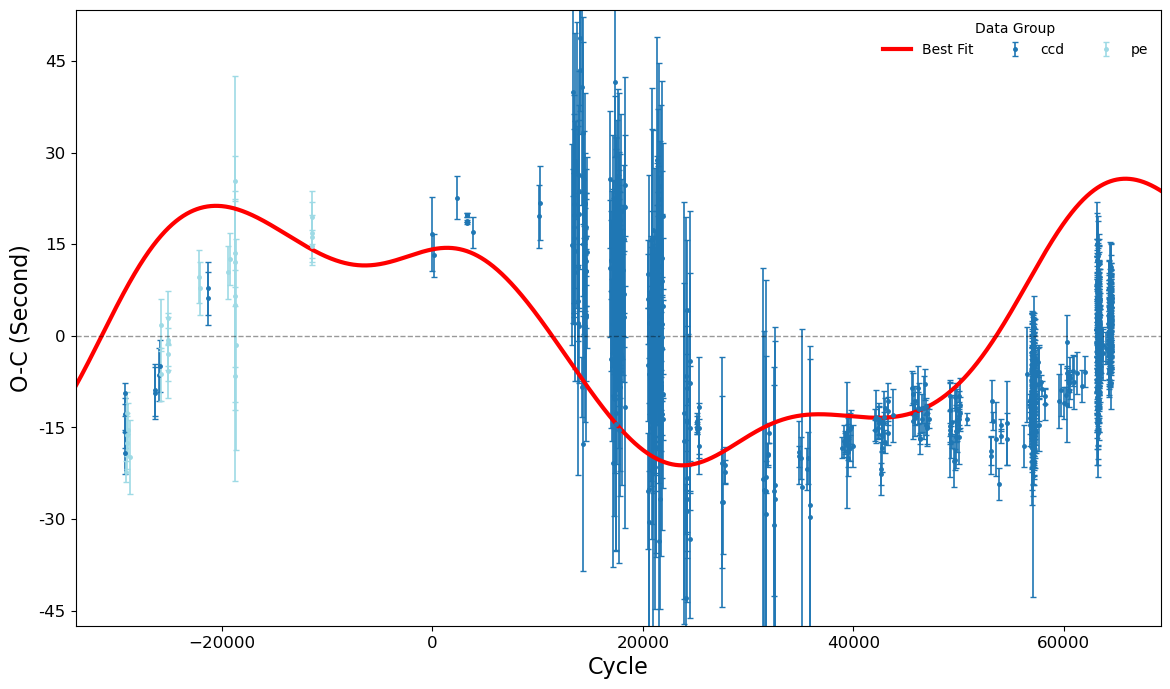

In [7]:
# Plotting fit object with given parameters
fit.plot()

In [8]:
# Fitting using lmfit with nelder method
result = fit.fit_model(method="nelder")

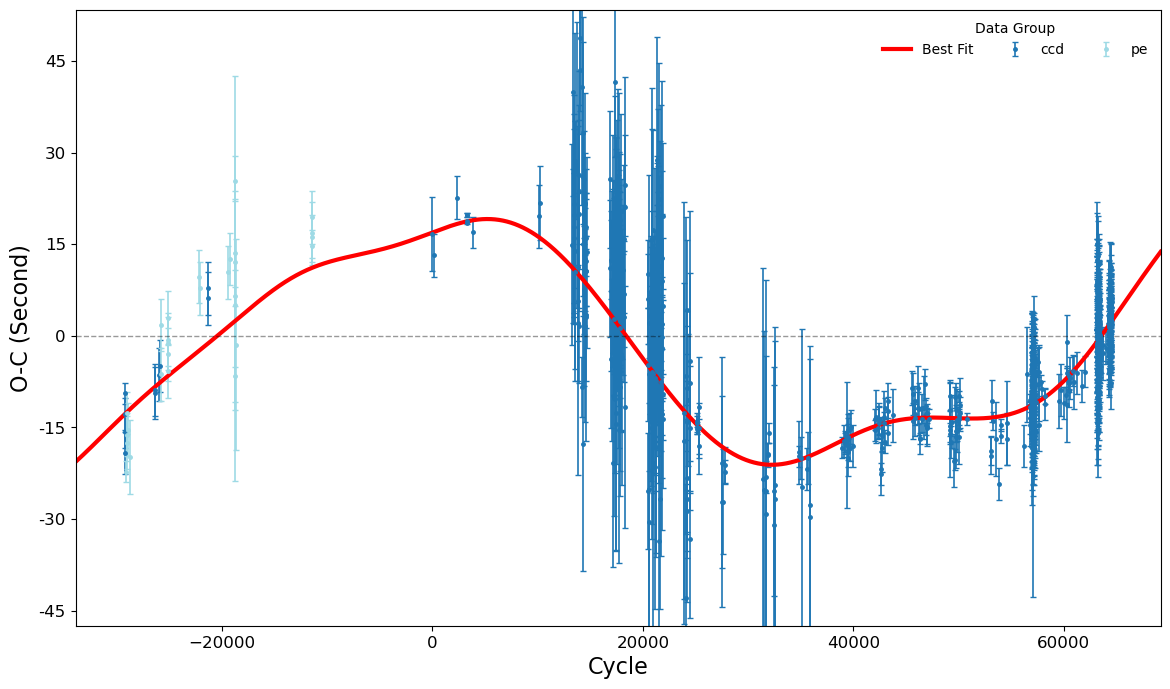

In [9]:
# Plotting with parameters found with fitting.
fit.plot()

In [12]:
# Get fitted parameters
fit.model_params()

{'e': 0.08621559042672072 Unitless, 'omega': 0.7355020545709157 deg, 'P_LiTE': 3577.8775940152036 day, 'T_LiTE': 2446182.6804066855 BJD, 'amp': 8.151194222860703e-05 day}
{'e': 0.3755688417100963 Unitless, 'omega': 20.15093268214095 deg, 'P_LiTE': 8017.399525089507 day, 'T_LiTE': 2347377.2865115674 BJD, 'amp': 0.00024022737669815442 day}


In [11]:
# Finding orbital parameters for calculated parameters
inc = 80.73
inc_std = 0
m1 = 0.471
m1_std = 0
m2 = 0.13
m2_std = 0
fit.find_orbital_parameters(inc=inc, inc_std=inc_std, m1=m1, m1_std=m1_std, m2=m2, m2_std=m2_std)

# Note nelder can't calculate uncertanities

{'a12_sin_lte1': 0.014166533121421746+/-nan,
 'a12_lte1': 0.014353993452629606+/-nan,
 'm_sini_msol_lte1': 0.0022090852589210634+/-0,
 'm_sini_mjup_lte1': 2.314149353835349+/-0,
 'm_msol_lte1': 0.0022383897343228945+/-0,
 'm_jup_lte1': 2.3448475500872914+/-0,
 'a_AU_lte1': 3.8539982259344825+/-nan,
 'p_day_lte1': 361.4227721228344+/-nan,
 'p_year_lte1': 0.9895427557724082+/-nan,
 'ecc_lte1': 0.08621559042672072+/-nan,
 'omega_lte1': 0.7355020545709157+/-nan,
 'T_LiTE_lte1': 2700277.9565812983+/-0,
 'a12_sin_lte2': 0.04444986026645321+/-nan,
 'a12_lte2': 0.045038048318976266+/-nan,
 'm_sini_msol_lte2': 0.00405601047811535+/-0,
 'm_sini_mjup_lte2': 4.248914336454516+/-0,
 'm_msol_lte2': 0.004109926253670834+/-0,
 'm_jup_lte2': 4.305394346295419+/-0,
 'a_AU_lte2': 6.585973900511893+/-nan,
 'p_day_lte2': 809.8853818870563+/-nan,
 'p_year_lte2': 2.217392689301644+/-nan,
 'ecc_lte2': 0.3755688417100963+/-nan,
 'omega_lte2': 20.15093268214095+/-nan,
 'T_LiTE_lte2': 2690297.0339745563+/-0}